In [84]:
from __future__ import print_function, division, absolute_import
import numpy as np
import glob
import os
import cPickle
import h5py
import os.path as op
import nibabel as nib
from skbold.utils import DataHandler
from skbold.transformers import MeanEuclidean
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
%matplotlib inline

In [9]:
data_path = '/home/lukas/sub002'
dh = DataHandler()

mvp = dh.load_separate_sub(data_path, remove_zeros=True)

In [118]:
scaler = StandardScaler()
transformer = MeanEuclidean(cutoff=1.5, normalize=False)
clf = SVC(kernel='linear', decision_function_shape='ovo', probability=True)
pipeline = Pipeline([('transformer', transformer),
                     ('scaler', scaler),
                     ('classifier', clf)])

In [146]:
pipeline.fit(mvp.X, mvp.y)
W = pipeline.named_steps['classifier'].coef_.T
X = mvp.X[:, pipeline.named_steps['transformer'].idx_]
Xcov = np.cov(X.T)
s = np.cov(W.T.dot(X.T))
A = Xcov.dot(W).dot(np.linalg.pinv(s))

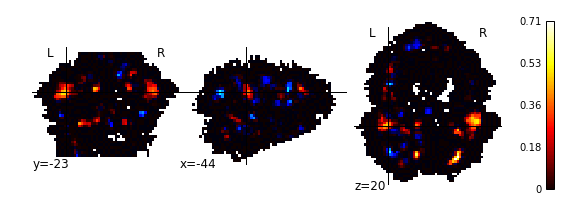

In [145]:
from nilearn.plotting import plot_stat_map

to_plot = np.zeros(mvp.X.shape[1])
to_plot[pipeline.named_steps['transformer'].idx_] = A[:, 0]
img = np.zeros(mvp.mask_shape).ravel()
img[mvp.mask_index] = to_plot
img = np.ma.array(img.reshape(mvp.mask_shape), mask=img < 0.0001)
img = nib.Nifti1Image(img, mvp.affine)
weightsplot = plot_stat_map(img, bg_img=None)

nib.save(img, '/home/lukas/act.nii')

In [125]:
to_plot = np.zeros(mvp.X.shape[1])
to_plot[pipeline.named_steps['transformer'].idx_] = 1
img = np.zeros(mvp.mask_shape).ravel()
img[mvp.mask_index] = to_plot
img = np.ma.array(img.reshape(mvp.mask_shape), mask=img < 0.0001)
img = nib.Nifti1Image(img, mvp.affine)
nib.save(img, '/home/lukas/test2.nii')